# Grover's Algorithm
https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm \
https://github.com/microsoft/QuantumKatas/blob/main/GroversAlgorithm/GroversAlgorithm.ipynb \
Representing Multi-Qubit States: https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html#represent

In [ ]:
# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit import *

In [ ]:
n = 2
grover_circuit = QuantumCircuit(n)

In [ ]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc


grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [ ]:
# Oracle

# version one: takes |11>
'''
grover_circuit.cz(0,1)
grover_circuit.draw()
'''
# version two: takes |10>
'''
grover_circuit.z(1)
grover_circuit.cz(0,1)
grover_circuit.draw()
'''
# version three: |01>

grover_circuit.z(0)
grover_circuit.cz(0,1)
grover_circuit.draw()


┌───┐┌───┐   
q_0: ┤ H ├┤ Z ├─■─
     ├───┤└───┘ │ 
q_1: ┤ H ├──────■─
     └───┘

In [ ]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])

In [ ]:
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌───┐   ┌───┐┌───┐   ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├┤ Z ├─■─┤ H ├┤ Z ├─■─┤ H ├─░─┤M├───
        ├───┤└───┘ │ ├───┤├───┤ │ ├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├──────■─┤ H ├┤ Z ├─■─┤ H ├─░──╫─┤M├
        └───┘        └───┘└───┘   └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

{'01': 1024}


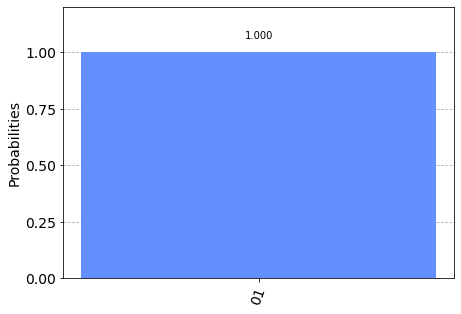

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Other

In [ ]:
test_circuit = QuantumCircuit(1)
test_circuit.x(0)
test_circuit.z(0)
test_circuit.measure_all()

test_circuit.draw()

┌───┐┌───┐ ░ ┌─┐
   q_0: ┤ X ├┤ Z ├─░─┤M├
        └───┘└───┘ ░ └╥┘
meas: 1/══════════════╩═
                      0

In [ ]:
backend = Aer.get_backend('statevector_simulator')
job = execute(test_circuit, backend)
result = job.result()
outputstate = result.get_statevector(test_circuit, decimals=3)
print(outputstate)

[ 0.+0.j -1.-0.j]


In [ ]:
oracle = QuantumCircuit(2)
oracle.initialize([0+0j, 1+0j, 0+0j, 0+0j], (0, 1))
oracle.z(0)
#oracle.cz(0, 1)
oracle.measure_all()

oracle.draw()

┌──────────────────────┐┌───┐ ░ ┌─┐   
   q_0: ┤0                     ├┤ Z ├─░─┤M├───
        │  Initialize(0,1,0,0) │└───┘ ░ └╥┘┌─┐
   q_1: ┤1                     ├──────░──╫─┤M├
        └──────────────────────┘      ░  ║ └╥┘
meas: 2/═════════════════════════════════╩══╩═
                                         0  1

In [ ]:
backend = Aer.get_backend('statevector_simulator')
job = execute(oracle, backend)
result = job.result()
outputstate = result.get_statevector(oracle, decimals=3)
print(outputstate)

[ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c782e670-8153-4fc7-a9a3-0ae2dddfa952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>